 UMI может распределяться бимодально по нескольким причинам. Во первых, в одном наборе данных могут присутствовать разные типы клеток с различной активностью транскрипции. Например высоактивные и малоактивные клетки, будет две моды. Во-вторых, технические причины вносят вклад в проявление бимодальности

Macosko et al. (2015) - "Highly Parallel Genome-wide Expression Profiling of Individual Cells Using Nanoliter Droplets"

Zheng et al. (2017) - "Massively parallel digital transcriptional profiling of single cells"

Alemu et al. (2020) - "Single-cell RNA sequencing of immune cells: An update"

In [1]:
!pip install scanpy[leiden] scrublet
!gdown "1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.2 MB/s eta 0:00:00
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552446 sha256=b928ee26338414c758264be94cfa48c9fb68356e74e660594994f92e0746e0c3
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
  Creat

In [4]:
!wget https://datasets.cellxgene.cziscience.com/f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad
adata = sc.read_h5ad('f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad.1')
adata.var_names_make_unique()

--2024-07-15 02:56:20--  https://datasets.cellxgene.cziscience.com/f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad
Resolving datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)... 13.32.151.100, 13.32.151.108, 13.32.151.37, ...
Connecting to datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)|13.32.151.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 362766772 (346M) [binary/octet-stream]
Saving to: ‘f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad.1’

f8f41e86-e9ed-4de7- 100%[===================>] 345.96M   192MB/s    in 1.8s    

2024-07-15 02:56:22 (192 MB/s) - ‘f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad.1’ saved [362766772/362766772]



In [5]:
import scanpy as sc
import seaborn as sns
import numpy as np

sc.settings.verbosity = 3

In [6]:
print(adata.shape)
adata
print(adata.obs.cell_type)
adata.var

(66985, 36263)
0002_AAACCCACAAGTCCCG-1                      CD4-positive, alpha-beta T cell
0002_AAACCCAGTAGTCGTT-1    CD16-positive, CD56-dim natural killer cell, h...
0002_AAACCCATCTACACAG-1                                       dendritic cell
0002_AAACGAAAGAATTTGG-1                      CD4-positive, alpha-beta T cell
0002_AAACGCTAGCGACTGA-1                               CD14-positive monocyte
                                                 ...                        
079_TTTGGAGTCAGAGTGG-1                                CD14-positive monocyte
079_TTTGGAGTCGACATAC-1                                CD14-positive monocyte
079_TTTGGTTAGGTTATAG-1     CD16-positive, CD56-dim natural killer cell, h...
079_TTTGGTTCACACCAGC-1                                   natural killer cell
079_TTTGTTGGTTGTTGCA-1                       CD4-positive, alpha-beta T cell
Name: cell_type, Length: 66985, dtype: category
Categories (9, object): ['platelet', 'B cell', 'dendritic cell', 'natural killer cell', ..

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSG00000243485,False,MIR1302-2HG,NCBITaxon:9606,gene,1021
ENSG00000237613,False,FAM138A,NCBITaxon:9606,gene,1219
ENSG00000186092,False,OR4F5,NCBITaxon:9606,gene,2618
ENSG00000238009,False,ENSG00000238009.6,NCBITaxon:9606,gene,3726
ENSG00000239945,False,ENSG00000239945.1,NCBITaxon:9606,gene,1319
...,...,...,...,...,...
ENSG00000277836,False,ENSG00000277836.1,NCBITaxon:9606,gene,288
ENSG00000278633,False,ENSG00000278633.1,NCBITaxon:9606,gene,2404
ENSG00000276017,False,ENSG00000276017.1,NCBITaxon:9606,gene,2404
ENSG00000278817,False,ENSG00000278817.1,NCBITaxon:9606,gene,1213


In [7]:
print(adata[adata.obs.cell_type == 'B cell'].shape)

(3540, 36263)


In [8]:
adata = adata[adata.obs.cell_type == 'platelet']
adata.shape

(505, 36263)

In [9]:
sc.pp.calculate_qc_metrics(
    adata,
    inplace=True,
    log1p=False,
    percent_top=None,
)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_qc.py:141: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


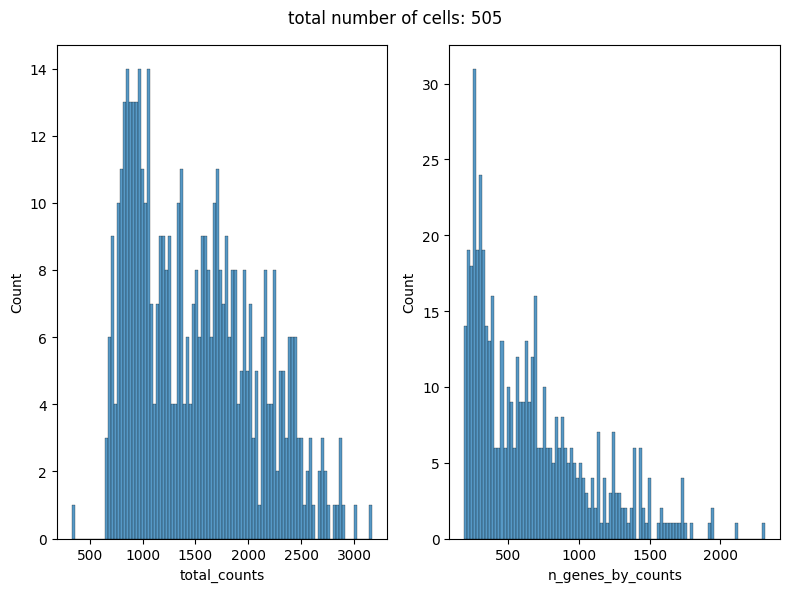

In [10]:
import matplotlib.pyplot as plt
adata1 = adata[adata.obs.cell_type == 'platelet']
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 6))
sns.histplot(adata1.obs.total_counts, ax=axes[0], bins=100)
sns.histplot(adata1.obs.n_genes_by_counts, ax=axes[1], bins=100)
plt.suptitle(f"total number of cells: {len(adata1)}")
fig.tight_layout()

In [11]:
sc.pp.scrublet(adata1)
print(adata1)

Running Scrublet
filtered out 26011 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:10)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:00:15)
AnnData object with n_obs × n_vars = 505 × 36263
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification.global', 'sample', 'donor_id', 'CHIP', 'LANE', 'P

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scrublet/__init__.py:289: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


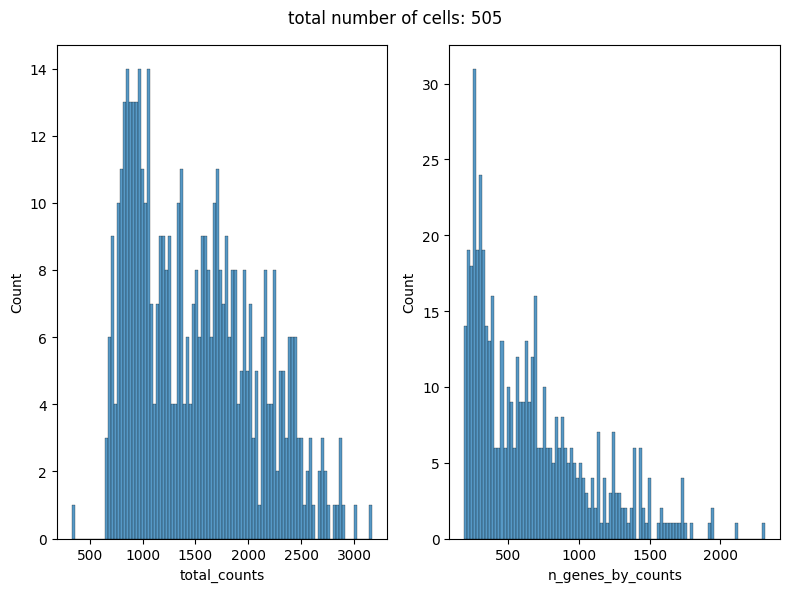

In [13]:
adata1 = adata[adata.obs.cell_type == 'platelet']
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 6))
sns.histplot(adata1.obs.total_counts, ax=axes[0], bins=100)
sns.histplot(adata1.obs.n_genes_by_counts, ax=axes[1], bins=100)
plt.suptitle(f"total number of cells: {len(adata1)}")
fig.tight_layout()

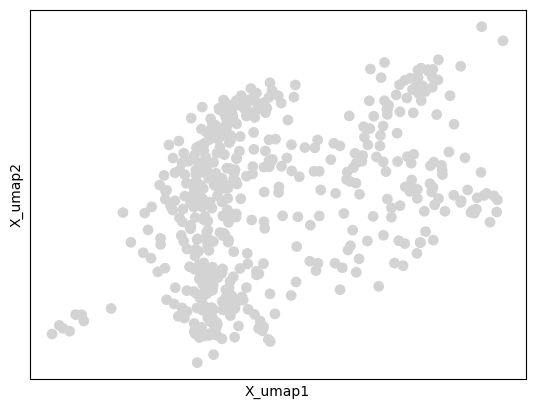

In [14]:
sc.pl.embedding(adata1, basis="X_umap")

<Axes: ylabel='Count'>

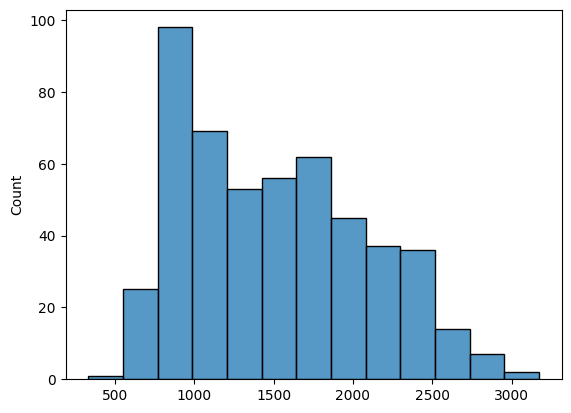

In [15]:
counts_per_cell = adata1.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell)